#            ***PREDICTING EMOJI FROM EMOTIONS AND SARCASM IN TEXT***




# **Sarcasm detection**

# 1. Sarcasm detection from tweet dataset- model1

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
train = pd.read_csv('train.csv')
train.head()

tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative

In [3]:
test = pd.read_csv('test.csv')
test.head()

tweets       class
0  no one ever predicted this was going to happen...  figurative
1  @Stooshie its as closely related as Andrews or...  figurative
2  I find it ironic when Vegans say they love foo...  figurative
3  Quick rt that throwing money vine I've not see...  figurative
4  yep, keep adding me to your #devops lists.... ...  figurative

In [4]:
train['class'].value_counts()

figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: class, dtype: int64

In [5]:
test['class'].value_counts()

irony         2111
sarcasm       2105
figurative    2044
regular       1859
Name: class, dtype: int64

In [6]:
# drop figurative class to stabilize the dataset
drop1 = train[ (train['class'] == 'figurative')].index
print(len(drop1))
train1=train.drop(index=drop1, inplace=False)
train1.reset_index(inplace = True)
train1.head()

21238


index                                             tweets  class
0  21238  Fav moment in Sepp Blatter vid (0:20): "We hav...  irony
1  21239  Just found this while walking my human.... #ir...  irony
2  21240  'Disrespected the wife of Prophet' - pseudo li...  irony
3  21241  Do you know that super yeay satisfying feeling...  irony
4  21242  If you're going to call someone ignorant and s...  irony

In [7]:
train1=train1.drop(columns=['index'])
train1.head()

tweets  class
0  Fav moment in Sepp Blatter vid (0:20): "We hav...  irony
1  Just found this while walking my human.... #ir...  irony
2  'Disrespected the wife of Prophet' - pseudo li...  irony
3  Do you know that super yeay satisfying feeling...  irony
4  If you're going to call someone ignorant and s...  irony

In [8]:
train1['class'].value_counts()

irony      20894
sarcasm    20681
regular    18595
Name: class, dtype: int64

In [9]:
drop1 = test[ (test['class'] == 'figurative')].index
print(len(drop1))
test1=test.drop(index=drop1, inplace=False)
test1.reset_index(inplace = True)
test1=test1.drop(columns=['index'])
test1.head()

2044


tweets  class
0  Oh Scotland's only conservative MP is only a f...    NaN
1                               I love going to work    NaN
2  @BBCTalkback nhs nurse hurts shoulder in work ...  irony
3  @jeffmeintzer @FoxNews @fxnscitech well wouldn...  irony
4  #IRONY Funny How more media reporters cover th...  irony

In [10]:
test1['class'].value_counts()

irony      2111
sarcasm    2105
regular    1859
Name: class, dtype: int64

In [11]:
# drop the null values 

test1.dropna(axis=0, inplace=True)

In [12]:
print(f'Null values : \n{test1.isna().sum()}')

Null values : 
tweets    0
class     0
dtype: int64


In [13]:
# reclassifying irony and sarcasm label to sarcastic labels(1) and regular as non-sarcastic(0)
sarc = {'irony': 1, 'sarcasm': 1, 'regular':0}
test1['class']=[sarc[x] for x in test1['class']]
test1.head()

tweets  class
2  @BBCTalkback nhs nurse hurts shoulder in work ...      1
3  @jeffmeintzer @FoxNews @fxnscitech well wouldn...      1
4  #IRONY Funny How more media reporters cover th...      1
5  BigLaw firm asks for help improving efficiency...      1
6  @klbraggg I was just making myself sad by watc...      1

In [14]:
test1.reset_index(inplace = True)
test1=test1.drop(columns=['index'])
test1.head()

tweets  class
0  @BBCTalkback nhs nurse hurts shoulder in work ...      1
1  @jeffmeintzer @FoxNews @fxnscitech well wouldn...      1
2  #IRONY Funny How more media reporters cover th...      1
3  BigLaw firm asks for help improving efficiency...      1
4  @klbraggg I was just making myself sad by watc...      1

In [15]:
train1.dropna(axis=0, inplace=True)

In [16]:
print(f'Null values : \n{train1.isna().sum()}')

Null values : 
tweets    0
class     0
dtype: int64


In [17]:
sarc = {'irony': 1, 'sarcasm': 1, 'regular':0}
train1['class']=[sarc[x] for x in train1['class']]
train1.head()

tweets  class
0  Fav moment in Sepp Blatter vid (0:20): "We hav...      1
1  Just found this while walking my human.... #ir...      1
2  'Disrespected the wife of Prophet' - pseudo li...      1
3  Do you know that super yeay satisfying feeling...      1
4  If you're going to call someone ignorant and s...      1

In [18]:
!pip install emoji

In [19]:

import re 
from lxml import html
from emoji import demojize

import nltk
nltk.download('stopwords')


import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


stemmer = PorterStemmer()
stop = stopwords.words('english')

def clean_text(text):
    
    # Remove Hyperlinks
    text = re.sub('http\S+', ' ', text)

    # Remove non alphabets
    text = re.sub('[^a-zA-Z ]+', ' ', text)

    # Lowercase and split
    text = text.lower().split()

    # Remove stopwords and short words
    text = [stemmer.stem(word) for word in text if word not in stop and len(word) > 2]

    # Join and Return
    return ' '.join(text)

def clean_text2(tweet):
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    tweet = re.sub('#\S+', '', tweet)
    
    #emojis
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    tweet =  emoji_pattern.sub(r'', tweet)
    
    # usernames mentions like "@abc123"
    ment = re.compile(r"(@[A-Za-z0-9]+)")
    tweet =  ment.sub(r'', tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # html tags
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    tweet = re.sub(html, '', tweet)
    
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r'https?://\S+|www\.\S+','', tweet)
        
    #Punctuations and special characters
    
    tweet = re.sub('[%s]' % re.escape(string.punctuation),'',tweet)
    
    tweet = tweet.lower()
    
    splits = tweet.split()
    splits = [word for word in splits if word not in set(nltk.corpus.stopwords.words('english'))]
    tweet = ' '.join(splits)
    
    return tweet
    

[nltk_data] Downloading package stopwords to C:\Users\Aparna
[nltk_data]     Subramanian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
print(f'Original String: {train1.tweets[0]}')
print(f'Cleaned String: {clean_text2(train1.tweets[0])}')

Original String: Fav moment in Sepp Blatter vid (0:20): "We have to clean here first. This has nothing to do with football." https://t.co/4dhWOK9x2e #irony
Cleaned String: fav moment sepp blatter vid 020 clean first nothing football


In [21]:
text = train1['tweets'].apply(clean_text2)

In [22]:
text[:10]

0    fav moment sepp blatter vid 020 clean first no...
1                                  found walking human
2    disrespected wife prophet pseudo libtards play...
3    know super yeay satisfying feeling get say exa...
4    going call someone ignorant stupid social medi...
5    tune nigezie treated rachel plattens fight son...
6    looking forward next week stepping away flash ...
7    get work realize oatmeal packet grabbed dinooa...
8    two recent tweets sexism favorited twitter acc...
9    waise blocking means nida awesome u remember h...
Name: tweets, dtype: object

In [23]:
text1 = test1['tweets'].apply(clean_text2)

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le = le.fit(train1['class'])
le = le.fit(test1['class'])

In [25]:
label = le.transform(train1['class'])
label2 = le.transform(test1['class'])

In [26]:
text[:10], label[:10]

(0    fav moment sepp blatter vid 020 clean first no...
 1                                  found walking human
 2    disrespected wife prophet pseudo libtards play...
 3    know super yeay satisfying feeling get say exa...
 4    going call someone ignorant stupid social medi...
 5    tune nigezie treated rachel plattens fight son...
 6    looking forward next week stepping away flash ...
 7    get work realize oatmeal packet grabbed dinooa...
 8    two recent tweets sexism favorited twitter acc...
 9    waise blocking means nida awesome u remember h...
 Name: tweets, dtype: object,
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [27]:
text1[:10], label2[:10]

(0    nhs nurse hurts shoulder work go private get f...
 1    well would say hilarious ironic people violate...
 2    funny media reporters cover confederate battle...
 3    biglaw firm asks help improving efficiency sen...
 4           making sad watching videos boys never meet
 5                              rodney mound definition
 6                                           head lines
 7    k rt trying 2 shade any1 style thought caption...
 8                          sex ratio 11 men vs 2 women
 9    poland attacked well germany 1939 guys always ...
 Name: tweets, dtype: object,
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [28]:
print(text.shape)
print(label.shape)

(60170,)
(60170,)


In [29]:
print(text1.shape)
print(label2.shape)

(6075,)
(6075,)


In [30]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
#training_size = 40000

In [31]:
sentences = []
labels = []

for item in range(0,len(text)):
    sentences.append(text[item])
    labels.append(label[item])

In [32]:
sentences1 = []
label3 = []

for item in range(0,len(text1)):
    sentences1.append(text1[item])
    label3.append(label2[item])

In [33]:
training_sentences = sentences[0:len(sentences)]
testing_sentences = sentences1[0:len(sentences1)]
training_labels = labels[0:len(sentences)]
testing_labels = label3[0:len(sentences1)]

In [34]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [36]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 64)          12544     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 2

In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

In [39]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels),batch_size=32,callbacks=[callback], verbose=2)

Epoch 1/30
1881/1881 - 142s - loss: 0.4756 - accuracy: 0.7769 - val_loss: 0.4333 - val_accuracy: 0.8066 - 142s/epoch - 75ms/step
Epoch 2/30
1881/1881 - 133s - loss: 0.3947 - accuracy: 0.8238 - val_loss: 0.4365 - val_accuracy: 0.8082 - 133s/epoch - 71ms/step
Epoch 3/30
1881/1881 - 146s - loss: 0.3532 - accuracy: 0.8441 - val_loss: 0.4599 - val_accuracy: 0.7970 - 146s/epoch - 78ms/step
Epoch 4/30
1881/1881 - 163s - loss: 0.3137 - accuracy: 0.8641 - val_loss: 0.4819 - val_accuracy: 0.7965 - 163s/epoch - 86ms/step
Epoch 5/30
1881/1881 - 160s - loss: 0.2728 - accuracy: 0.8798 - val_loss: 0.5202 - val_accuracy: 0.7895 - 160s/epoch - 85ms/step
Epoch 6/30
1881/1881 - 161s - loss: 0.2380 - accuracy: 0.8933 - val_loss: 0.6737 - val_accuracy: 0.7839 - 161s/epoch - 86ms/step
Epoch 7/30
1881/1881 - 155s - loss: 0.2094 - accuracy: 0.9042 - val_loss: 0.7015 - val_accuracy: 0.7743 - 155s/epoch - 83ms/step
Epoch 8/30
1881/1881 - 157s - loss: 0.1855 - accuracy: 0.9141 - val_loss: 0.7776 - val_accuracy: 

In [115]:
model.save_weights('./weights-project', tf)
# model.save_model('./weights-with-model', tf)

accuracy of the model: [0.7998499870300293, 0.9113500118255615, 0.9488000273704529, 0.9710500240325928, 0.9835500121116638, 0.9882000088691711, 0.9912999868392944, 0.9930499792098999, 0.9942499995231628, 0.9955000281333923, 0.9958000183105469, 0.996749997138977, 0.9971500039100647, 0.9976500272750854, 0.9979000091552734, 0.9973000288009644, 0.9986500144004822, 0.9991999864578247, 0.9980499744415283, 0.9978500008583069, 0.9982500076293945, 0.9993000030517578, 0.9989500045776367, 0.9994999766349792, 0.9993500113487244, 0.9994999766349792, 0.9995499849319458, 0.9991000294685364, 0.9985499978065491, 0.9994999766349792]


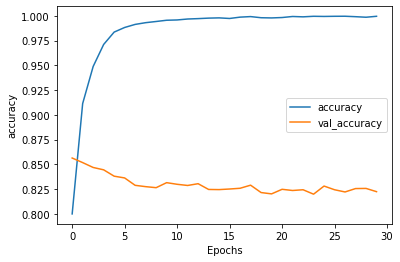

loss of the model: [0.4073096513748169, 0.22048254311084747, 0.13819800317287445, 0.08489429205656052, 0.05210328474640846, 0.035936031490564346, 0.02657659910619259, 0.021235300227999687, 0.017650676891207695, 0.012552392669022083, 0.011945809237658978, 0.009567338973283768, 0.008095169439911842, 0.006723346654325724, 0.0063882009126245975, 0.007548382505774498, 0.0047145988792181015, 0.0032143641728907824, 0.004954980220645666, 0.00571218878030777, 0.005239921156316996, 0.002188250655308366, 0.002945968182757497, 0.0020148393232375383, 0.0020360611379146576, 0.0014972228091210127, 0.001383866649121046, 0.0025619189254939556, 0.004643816500902176, 0.0015799299580976367]


In [118]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  print("{0} of the model: {1}".format(string, history.history[string]))
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

The accuracy of this model comes out to 75% approximately

In [116]:
model_loaded = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

# model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_loaded.load_weights('./weights-project')
# model_loaded_2.load_model('./weights-with-model')

In [120]:
predict = pd.read_csv("test-predictions.csv")

In [121]:
predict.dropna(axis=0, inplace=True)

In [122]:
predict1 = predict['tweets'].apply(clean_text2)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [123]:
sentences2 = []
for item in range(0,len(predict1)):
    sentences2.append(predict1[item])
    

In [124]:
testing_sentences1 = sentences2[0:len(sentences2)]

In [128]:
testing_sequences1 = tokenizer.texts_to_sequences(testing_sentences1)
test_padded_1_predicted = pad_sequences(testing_sequences1, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_padded_1_predicted = np.array(test_padded_1_predicted)

In [129]:
predicted_results = model_loaded.predict(test_padded_1_predicted)

In [130]:
df_test["Output"] = predicted_results
df_test.to_csv("Output_Predictions.csv")

Sample predictions

In [41]:
sentence = ["I don't like you." ]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.60602176]]


In [42]:
sentence = ["It’s okay if you don’t like me. Not everyone has good taste." ]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.97915095]]


In [43]:
sentence = ["I am pretty bad." ]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.29005557]]


In [44]:
sentence = [ "I’m not saying I hate you, what I’m saying is that you are literally the Monday of my life."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.99994624]]


In [45]:
sentence = [ "We see them every week."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.31222337]]


# 2. Sarcasm detection from news headlines dataset- model2

In [46]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [48]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O sarcasm.json

--2022-03-17 08:47:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.193.112, 142.250.195.112, 172.217.160.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.193.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: 'sarcasm.json'

     0K .......... .......... .......... .......... ..........  0% 12.3K 7m25s
    50K .......... .......... .......... .......... ..........  1% 10.6K 7m56s
   100K .......... .......... .......... .......... ..........  2% 10.6K 8m3s
   150K .......... .......... .......... .......... ..........  3% 10.9K 8m1s
   200K .......... .......... .......... .......... ..........  4% 12.3K 7m47s
   250K .......... .......... .......... .......... ..........  5% 11.1K 7m44s
   300K .......... .......... .......... .......... ..........  6% 12.3K 7m33s
   350K ..........

In [49]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [50]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [51]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [52]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [53]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

model1.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 100, 32)          4224      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                

In [54]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
num_epochs = 30
history = model1.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels),batch_size=32,callbacks=[callback], verbose=2)

Epoch 1/30
625/625 - 31s - loss: 0.4073 - accuracy: 0.7998 - val_loss: 0.3315 - val_accuracy: 0.8563 - 31s/epoch - 50ms/step
Epoch 2/30
625/625 - 27s - loss: 0.2205 - accuracy: 0.9114 - val_loss: 0.3437 - val_accuracy: 0.8517 - 27s/epoch - 43ms/step
Epoch 3/30
625/625 - 27s - loss: 0.1382 - accuracy: 0.9488 - val_loss: 0.4023 - val_accuracy: 0.8468 - 27s/epoch - 44ms/step
Epoch 4/30
625/625 - 27s - loss: 0.0849 - accuracy: 0.9711 - val_loss: 0.5116 - val_accuracy: 0.8444 - 27s/epoch - 43ms/step
Epoch 5/30
625/625 - 27s - loss: 0.0521 - accuracy: 0.9836 - val_loss: 0.6800 - val_accuracy: 0.8380 - 27s/epoch - 43ms/step
Epoch 6/30
625/625 - 27s - loss: 0.0359 - accuracy: 0.9882 - val_loss: 0.6014 - val_accuracy: 0.8362 - 27s/epoch - 44ms/step
Epoch 7/30
625/625 - 28s - loss: 0.0266 - accuracy: 0.9913 - val_loss: 0.9971 - val_accuracy: 0.8287 - 28s/epoch - 44ms/step
Epoch 8/30
625/625 - 30s - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.9569 - val_accuracy: 0.8274 - 30s/epoch - 48ms/step


In [131]:
model1.save_weights('./weights-project1', tf)

In [132]:
model1_loaded=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [133]:
model1_loaded.load_weights('./weights-project1')

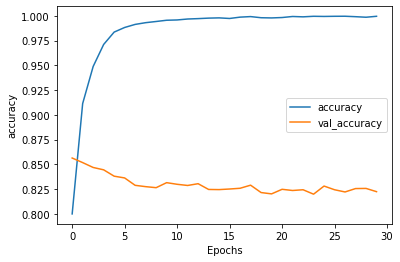

In [55]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

The accuracy of this model is 83% approximately.

Sample predictions

In [56]:
sentence = ["I don't like you." ]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model1.predict(padded))

[[1.5151135e-09]]


In [57]:
sentence = ["It’s okay if you don’t like me. Not everyone has good taste." ]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model1.predict(padded))

[[0.99939656]]


In [58]:
sentence = [ "We see them every week."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model1.predict(padded))

[[0.3978507]]


Since the 2nd model has a better accuracy, we choose that model.

**Test predictions**

In [59]:
sentence = [ "Yes, of course i am doing good."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
output1 = (model1.predict(padded))
print(output1)

[[0.9999993]]


In [60]:
sentence = [ "Tears are words that heart cannot express"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
output2 = (model1.predict(padded))
print(output2)

[[7.493041e-12]]


In [61]:
x = 0.5 # threshold value
# if the output is sarcastic then assigned to 1
# else assigned to 0

In [62]:
if output1 > x: 
  output1 = 1
else:
  output1 = 0
print(output1)

1


In [63]:
if output2 > 0.5:
  output2 = 1
else:
  output2 = 0
print(output2)

0


# **Emotion detection**

# 1. Emotion detection from own dataset- model1

In [64]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# feature extraction / vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline


In [135]:
df_train = pd.read_csv('data_train.csv')
df_test = pd.read_csv('data_test.csv')
df_test1 = pd.read_csv('data_test1.csv')

X_train = df_train.Text
X_test = df_test.Text
X_test1 = df_test1.Text

y_train = df_train.Emotion
y_test = df_test.Emotion

class_names = ['joy', 'sadness', 'anger', 'neutral', 'fear']
data = pd.concat([df_train, df_test])

print('size of training set: %s' % (len(df_train['Text'])))
print('size of validation set: %s' % (len(df_test['Text'])))
print(data.Emotion.value_counts())

data.head()

size of training set: 7934
size of validation set: 3393
joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64


Emotion                                               Text
0  neutral   There are tons of other paintings that I thin...
1  sadness  Yet the dog had grown old and less capable , a...
2     fear  When I get into the tube or the train without ...
3     fear  This last may be a source of considerable disq...
4    anger  She disliked the intimacy he showed towards so...

In [66]:
def preprocess_and_tokenize(data):    

    #remove html markup
    data = re.sub("(<.*?>)", "", data)

    #remove urls
    data = re.sub(r'http\S+', '', data)
    
    #remove hashtags and @names
    data= re.sub(r"(#[\d\w\.]+)", '', data)
    data= re.sub(r"(@[\d\w\.]+)", '', data)

    #remove punctuation and non-ascii digits
    data = re.sub("(\\W|\\d)", " ", data)
    
    #remove whitespace
    data = data.strip()
    
    # tokenization with nltk
    data = word_tokenize(data)
    
    # stemming with nltk
    porter = PorterStemmer()
    stem_data = [porter.stem(word) for word in data]
        
    return stem_data

In [136]:
import nltk
nltk.download('punkt')
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=preprocess_and_tokenize, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(data.Text)

# transform testing and training datasets to vectors
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)
X_test_vect1 = vect.transform(X_test1)

[nltk_data] Downloading package punkt to C:\Users\Aparna
[nltk_data]     Subramanian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##  Classifiers

###  a. Naive Bayes

In [68]:
nb = MultinomialNB()

nb.fit(X_train_vect, y_train)

ynb_pred = nb.predict(X_test_vect)

from sklearn.metrics import accuracy_score, f1_score

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ynb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ynb_pred, average='micro') * 100))

Accuracy: 67.02%

F1 Score: 67.02


### b. Random Forest

In [69]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_vect, y_train)

yrf_pred = rf.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))

Accuracy: 63.10%

F1 Score: 63.10


### c. Logistic Regression





In [70]:
log = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
log.fit(X_train_vect, y_train)

ylog_pred = log.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ylog_pred, average='micro') * 100))

Accuracy: 69.35%

F1 Score: 69.35


### d. Linear Support Vector





In [71]:
svc = LinearSVC(tol=1e-05)
svc.fit(X_train_vect, y_train)
ysvm_pred = svc.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))

Accuracy: 72.71%

F1 Score: 72.71


In [72]:
#Create pipeline with our tf-idf vectorizer and LinearSVC model
svm_model = Pipeline([
    ('tfidf', vect),
    ('clf', svc),
])

In [146]:
predicted = svm_model.predict(X_test_vect1)

In [140]:
df_test1["Output"] = predicted
df_test.to_csv("Output_Predictions1.csv")

The accuracy of this ensembling model is 72% approximately.

Sample predictions

In [73]:
message = "I and my sister don’t see each other anymore"
svm_model.predict([message])

array(['anger'], dtype=object)

In [74]:
message = "I finally passed my driving test. "
svm_model.predict([message])

array(['joy'], dtype=object)

# 2. Emotion detection from tweet dataset- model2

In [143]:
df_train = pd.read_csv('tweet_emotions_train.csv')
df_test = pd.read_csv('tweet_emotions_test.csv')
df_test2 = pd.read_csv('data_test1.csv')

X_train = df_train.Text
X_test = df_test.Text
X_test2 = df_test2.Text

y_train = df_train.Emotion
y_test = df_test.Emotion

class_names = ['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise', 'love', 'happiness', 'fun','hate','relief','boredom','anger']
data = pd.concat([df_train, df_test])

print('size of training set: %s' % (len(df_train['Text'])))
print('size of validation set: %s' % (len(df_test['Text'])))
print(data.Emotion.value_counts())

data.head()

size of training set: 39001
size of validation set: 999
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: Emotion, dtype: int64


Emotion                                               Text
0    neutral         How Come I Can Never Sleep Past?? Not Good
1      worry  @Sageey My public talk in July got canceled an...
2    neutral  @typicalrouse I would but its like 1800 or 100...
3      worry  Feeling so rough today, just want a cuddle and...
4  happiness  @cha_rade oh no the economy gotcha?  sorry but...

In [77]:
def preprocess_and_tokenize(data):    

    #remove html markup
    data = re.sub("(<.*?>)", "", data)

    #remove urls
    data = re.sub(r'http\S+', '', data)
    
    #remove hashtags and @names
    data= re.sub(r"(#[\d\w\.]+)", '', data)
    data= re.sub(r"(@[\d\w\.]+)", '', data)

    #remove punctuation and non-ascii digits
    data = re.sub("(\\W|\\d)", " ", data)
    
    #remove whitespace
    data = data.strip()
    
    # tokenization with nltk
    data = word_tokenize(data)
    
    # stemming with nltk
    porter = PorterStemmer()
    stem_data = [porter.stem(word) for word in data]
        
    return stem_data

In [144]:
import nltk
nltk.download('punkt')
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=preprocess_and_tokenize, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(data.Text)

# transform testing and training datasets to vectors
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)
X_text_vect2 = vect.transform(X_test2)

[nltk_data] Downloading package punkt to C:\Users\Aparna
[nltk_data]     Subramanian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##  Classifiers

### a. Naive Bayes

In [79]:
nb = MultinomialNB()

nb.fit(X_train_vect, y_train)

ynb_pred = nb.predict(X_test_vect)

from sklearn.metrics import accuracy_score, f1_score

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ynb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ynb_pred, average='micro') * 100))

Accuracy: 33.33%

F1 Score: 33.33


#### b. Random Forest

In [80]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_vect, y_train)

yrf_pred = rf.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))

Accuracy: 37.34%

F1 Score: 37.34


### c.  Logistic Regression

In [81]:
log = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=500)
log.fit(X_train_vect, y_train)

ylog_pred = log.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ylog_pred, average='micro') * 100))

Accuracy: 38.44%

F1 Score: 38.44


### d. Linear Support Vector

In [82]:
svc = LinearSVC(tol=1e-05)
svc.fit(X_train_vect, y_train)

ysvm_pred = svc.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))

Accuracy: 35.24%

F1 Score: 35.24


In [98]:
log_model = Pipeline([
    ('tfidf', vect),
    ('clf', log),
])

In [147]:
predicted1 = log_model.predict(X_test_vect2)

In [148]:
df_test2["Output"] = predicted1
df_test2.to_csv("Output_Predictions2.csv")

The accuracy of this ensembling model is 39% approximately.

Sample predictions

In [99]:
message = 'She seemed so sad for him. ' 
log_model.predict([message])

array(['sadness'], dtype=object)

In [100]:
message = 'My friend just got a new job and also bought a new car. He is such a happy camper at the moment.' 
log_model.predict([message])

array(['happiness'], dtype=object)

Since the 1st model has better accuracy, we choose that model.

**Test predictions**

In [101]:
message = "Yes, of course i am doing good." 
output3 = svm_model.predict([message])
print(output3)


['neutral']


In [102]:
message = "Tears are words that heart cannot express" 
output4 = svm_model.predict([message])
print(output4)

['sadness']


# **Predicting Emoji**

In [103]:
import emoji

In [104]:
output = ""

In [105]:
# for sarcastic emotions
if output1 == 1 and output3 == 'neutral':
  output = "\N{face without mouth}"
elif output1 == 1 and output3 == 'worry':
  output = "\N{upside-down face}"
elif output1 == 1 and output3 == 'happiness':
  output = "\N{face with Stuck-Out Tongue and Winking Eye}"
elif output1 == 1 and output3 == 'sadness':
  output = "\N{upside-down face}"
elif output1 == 1 and output3 == 'love':
  output = "\N{two hearts}"
elif output1 == 1 and output3 == 'surprise':
  output = "\N{face with open mouth}"
elif output1 == 1 and output3 == 'fun':
  output = "\N{grinning Face with One Large and One Small Eye}"
elif output1 == 1 and output3 == 'relief':
  output = "\N{relieved face}"
elif output1 == 1 and output3 == 'hate':
  output = "\N{unamused face}"
elif output1 == 1 and output3 == 'empty':
  output = "\N{face without mouth}"
elif output1 == 1 and output3 == 'enthusiasm':
  output = "\N{face with Stuck-Out Tongue and Winking Eye}"
elif output1 == 1 and output3 == 'boredom':
  output = "\N{face with rolling eyes}"
elif output1 == 1 and output3 == 'anger':
  output = "\N{angry face}"

In [106]:
# for non-sarcastic emotions
if output1 == 0 and output3 == "neutral":
  output = "\N{neutral face}"
elif output1 == 0 and output3 == 'worry':
  output = "\N{worried face}"
elif output1 == 0 and output3 == 'happiness':
  output = "\N{smiling face with smiling eyes}"
elif output1 == 0 and output3 == 'sadness':
  output = "\N{pensive face}"
elif output1 == 0 and output3 == 'love':
  output = "\N{Heavy black Heart}"
elif output1 == 0 and output3 == 'surprise':
  output = "\N{astonished face}"
elif output1 == 0 and output3 == 'fun':
  output = "\N{grinning face with smiling eyes}"
elif output1 == 0 and output3 == 'relief':
  output = "\N{Smiling Face with Open Mouth and Cold Sweat}"
elif output1 == 0 and output3 == 'hate':
  output = "\N{pouting face}"
elif output1 == 0 and output3 == 'empty':
  output = "\N{neutral face}"
elif output1 == 0 and output3 == 'enthusiasm':
  output = "\N{hugging face}"
elif output1 == 0 and output3 == 'boredom':
  output = (emoji.emojize(":yawning_face:"))
elif output1 == 0 and output3 == 'anger':
  output = "\N{pouting face}"
  

In [107]:
print('The predicted emoji for message "Yes, of course i am doing good" is :', output)

The predicted emoji for message "Yes, of course i am doing good" is : 😶


In [108]:
output_ = ""

In [109]:
if output2 == 1 and output4 == 'neutral':
  output_ = "\N{face without mouth}"
elif output2 == 1 and output4 == 'worry':
  output_ = "\N{upside-down face}"
elif output2 == 1 and output4 == 'happiness':
  output_ = "\N{face with Stuck-Out Tongue and Winking Eye}"
elif output2 == 1 and output4 == 'sadness':
  output_ = "\N{upside-down face}"
elif output2 == 1 and output4 == 'love':
  output_ = "\N{two hearts}"
elif output2 == 1 and output4 == 'surprise':
  output_ = "\N{face with open mouth}"
elif output2 == 1 and output4 == 'fun':
  output_ = "\N{grinning Face with One Large and One Small Eye}"
elif output2 == 1 and output4 == 'relief':
  output_ = "\N{relieved face}"
elif output2 == 1 and output4 == 'hate':
  output_ = "\N{unamused face}"
elif output2 == 1 and output4 == 'empty':
  output_ = "\N{face without mouth}"
elif output2 == 1 and output4 == 'enthusiasm':
  output_ = "\N{face with Stuck-Out Tongue and Winking Eye}"
elif output2 == 1 and output4 == 'boredom':
  output_ = "\N{face with rolling eyes}"
elif output2 == 1 and output4 == 'anger':
  output_ = "\N{angry face}"

In [110]:
if output2 == 0 and output4 == "neutral":
  output_ = "\N{neutral face}"
elif output2 == 0 and output4 == 'worry':
  output_ = "\N{worried face}"
elif output2 == 0 and output4 == 'happiness':
  output_ = "\N{smiling face with smiling eyes}"
elif output2 == 0 and output4 == 'sadness':
  output_ = "\N{pensive face}"
elif output2 == 0 and output4 == 'love':
  output_ = "\N{Heavy black Heart}"
elif output2 == 0 and output4 == 'surprise':
  output_ = "\N{astonished face}"
elif output2 == 0 and output4 == 'fun':
  output_ = "\N{grinning face with smiling eyes}"
elif output2 == 0 and output4 == 'relief':
  output_ = "\N{Smiling Face with Open Mouth and Cold Sweat}"
elif output2 == 0 and output4 == 'hate':
  output_ = "\N{pouting face}"
elif output2 == 0 and output4 == 'empty':
  output_ = "\N{neutral face}"
elif output2 == 0 and output4 == 'enthusiasm':
  output_ = "\N{hugging face}"
elif output2 == 0 and output4 == 'boredom':
  output_ = (emoji.emojize(":yawning_face:"))
elif output2 == 0 and output4 == 'anger':
  output_ = "\N{pouting face}"
  

In [111]:
print('The predicted emoji for message "Tears are words that heart cannot express"  is :', output_)

The predicted emoji for message "Tears are words that heart cannot express"  is : 😔


In [112]:
# to find the emoji we have demojized the emoji to text and then used the text to find the emoji
! pip install demoji
import demoji
# Text from where you want to convert emojis
#samples
text = "Convert  the given emojis to text 😐🙃😜💕😮🤪😌🙄😠😟😊😔❤️😲🥱😶"
emojis = demoji.findall(text)
# Print converted emojis
print(emojis)

{'😐': 'neutral face', '🥱': 'yawning face', '❤️': 'red heart', '😮': 'face with open mouth', '😶': 'face without mouth', '😌': 'relieved face', '🙃': 'upside-down face', '💕': 'two hearts', '🤪': 'zany face', '😔': 'pensive face', '😠': 'angry face', '😟': 'worried face', '😜': 'winking face with tongue', '😊': 'smiling face with smiling eyes', '🙄': 'face with rolling eyes', '😲': 'astonished face'}
